In [253]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#%matplotlib widget

# Tests Boris Pusher

In [254]:
with h5py.File("../build/uniform_bz.h5", "r") as f:
    print(list(f.keys()))
    x = f["x"][:]
    vx = f["vx"][:]
    vy = f["vy"][:]
    vz = f["vz"][:]

['vx', 'vy', 'vz', 'x']


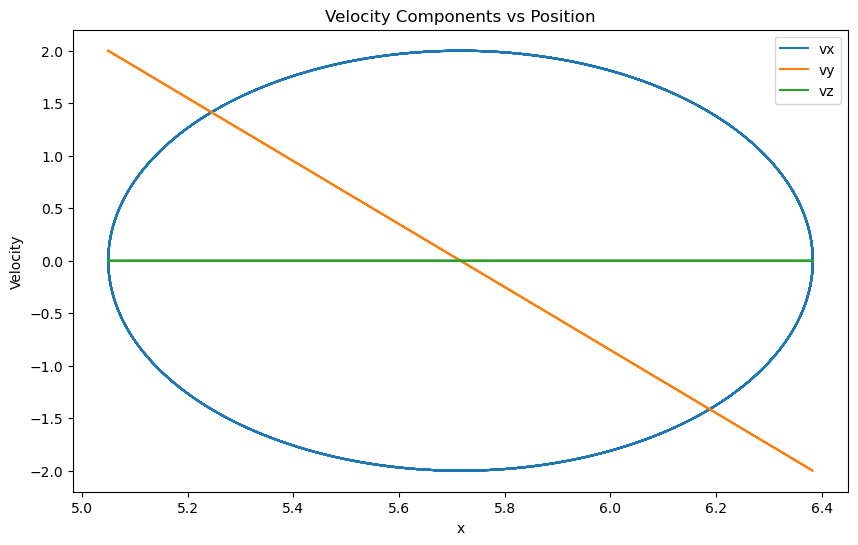

In [255]:
plt.figure(figsize=(10, 6))
plt.plot(x, vx, label='vx')
plt.plot(x, vy, label='vy')
plt.plot(x, vz, label='vz')
plt.xlabel('x')
plt.ylabel('Velocity')
plt.title('Velocity Components vs Position')
plt.legend()
plt.show()

In [256]:
with h5py.File("../build/drift_ey.h5", "r") as f:
    print(list(f.keys()))
    x = f["x"][:]
    vx = f["vx"][:]
    vy = f["vy"][:]
    vz = f["vz"][:]

['vx', 'vy', 'vz', 'x']


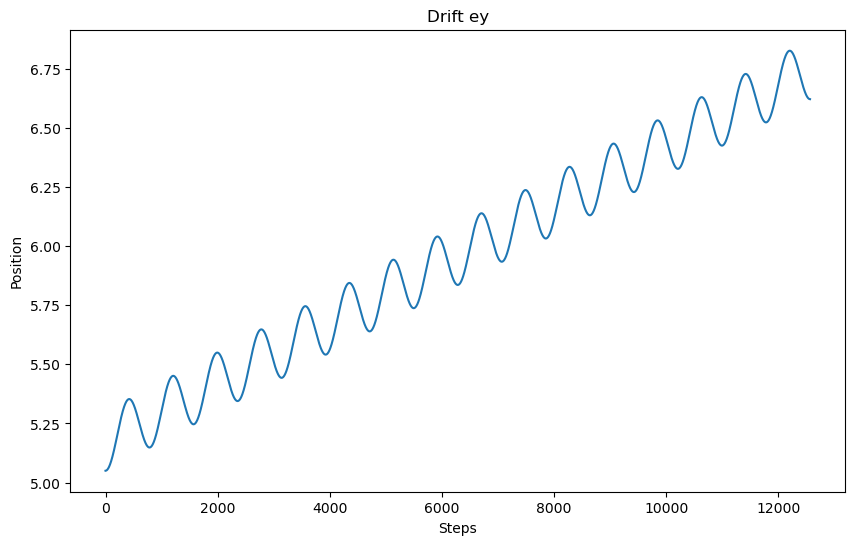

In [257]:
plt.figure(figsize=(10, 6))
plt.plot(x)
plt.xlabel('Steps')
plt.ylabel('Position')
plt.title('Drift ey')
plt.show()  

# Test population

In [258]:
with h5py.File("../build/population.h5", "r") as f:
    print(list(f.keys()))
    N = f["density"][:]
    vx = f["vx"][:]
    vy = f["vy"][:]
    vz = f["vz"][:]

['density', 'vx', 'vy', 'vz']


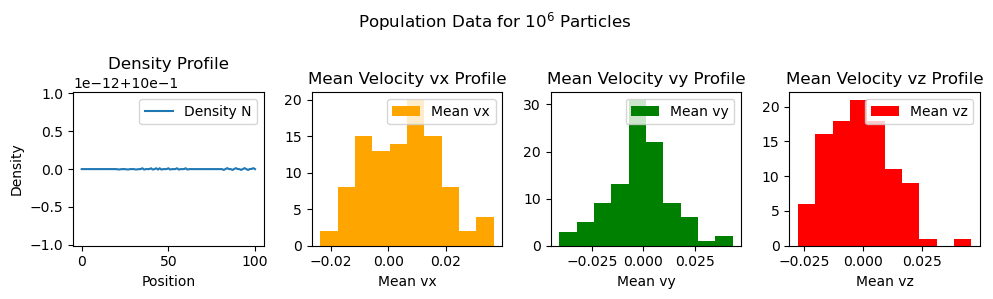

In [259]:
plt.figure(figsize=(10, 3))
plt.subplot(1 , 4, 1)
plt.plot(N, label='Density N')
plt.ylabel('Density')
plt.xlabel('Position')
plt.title('Density Profile')
plt.legend()    
plt.subplot(1, 4, 2)
plt.hist(vx, label='Mean vx', color='orange')
plt.xlabel('Mean vx')
plt.title('Mean Velocity vx Profile')
plt.legend()
plt.subplot(1, 4, 3)
plt.hist(vy, label='Mean vy', color='green')
plt.xlabel('Mean vy')
plt.title('Mean Velocity vy Profile')
plt.legend()
plt.subplot(1, 4, 4)
plt.hist(vz, label='Mean vz', color='red')
plt.xlabel('Mean vz')
plt.title('Mean Velocity vz Profile')
plt.suptitle('Population Data for $10^6$ Particles')
plt.legend()
plt.tight_layout()
plt.show()

# Test Ampere and Faraday

In [260]:
with h5py.File("../build/ampere.h5", "r") as f:
    print(list(f.keys()))
    Jx = f["Jx"][1:-1]
    Jy = f["Jy"][1:-1]
    Jz = f["Jz"][1:-1]

['Jx', 'Jy', 'Jz', 'expected_Jy', 'expected_Jz']


In [261]:
Jx.shape, Jy.shape, Jz.shape

((100,), (101,), (101,))

In [262]:
pos101 = np.arange(101)
expected_Jy = - np.cos(0.1*pos101)
expected_Jz = - np.sin(0.1*pos101)

/tmp/ipykernel_190154/3501994963.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot((Jz - expected_Jz)/expected_Jz, label='Residual Jz')


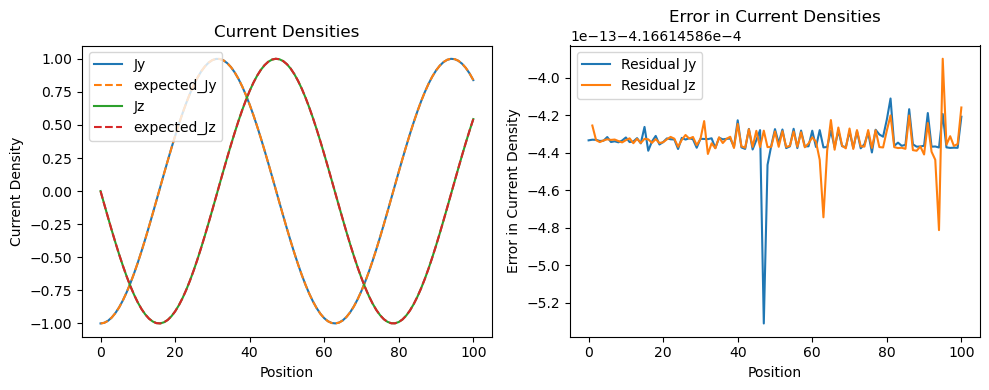

In [263]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Jy, label='Jy')
plt.plot(pos101, expected_Jy, '--', label='expected_Jy')
plt.plot(Jz, label='Jz')
plt.plot(pos101, expected_Jz, '--', label='expected_Jz')

plt.xlabel('Position')
plt.ylabel('Current Density')
plt.title('Current Densities')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot((Jy - expected_Jy)/expected_Jy, label='Residual Jy')
plt.plot((Jz - expected_Jz)/expected_Jz, label='Residual Jz')
plt.xlabel('Position')
plt.ylabel('Error in Current Density')
plt.title('Error in Current Densities')
plt.legend()
plt.tight_layout()
plt.show()

In [264]:
with h5py.File("../build/faraday.h5", "r") as f:
    print(list(f.keys()))
    Bx = f["Bnewx"][1:-1]
    By = f["Bnewy"][1:-1]
    Bz = f["Bnewz"][1:-1]
    expected_Bx = f["expected_Bx"][:]
    expected_By = f["expected_By"][:]
    expected_Bz = f["expected_Bz"][:]

['Bnewx', 'Bnewy', 'Bnewz', 'expected_Bx', 'expected_By', 'expected_Bz']


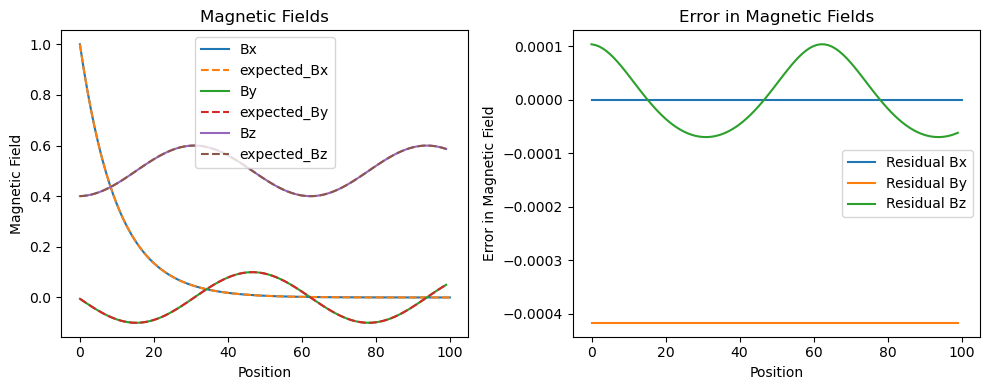

In [265]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(Bx, label='Bx')
plt.plot(expected_Bx, '--', label='expected_Bx')
plt.plot(By, label='By')
plt.plot(expected_By, '--', label='expected_By')
plt.plot(Bz, label='Bz')
plt.plot(expected_Bz, '--', label='expected_Bz')
plt.xlabel('Position')
plt.ylabel('Magnetic Field')
plt.title('Magnetic Fields')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot((Bx - expected_Bx)/expected_Bx, label='Residual Bx')
plt.plot((By - expected_By)/expected_By, label='Residual By')
plt.plot((Bz - expected_Bz)/expected_Bz, label='Residual Bz')
plt.xlabel('Position')
plt.ylabel('Error in Magnetic Field')
plt.title('Error in Magnetic Fields')
plt.legend()
plt.tight_layout()
plt.show()

In [266]:
with h5py.File("../build/particles_main.h5", "r") as f:
    # Liste tous les groupes de temps
    for t_group in f["t"].keys():
        print("Time group:", t_group)
        # Accède aux datasets pour ce temps
        x = f["t"][t_group]["x"][:]
        vx = f["t"][t_group]["vx"][:]
        vy = f["t"][t_group]["vy"][:]
        vz = f["t"][t_group]["vz"][:]
        print(f"x shape: {x.shape}, vx shape: {vx.shape}")
        # Tu peux ensuite ploter ou analyser ces données
    

Time group: 0.0000000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0010000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0020000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0030000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0040000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0050000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0060000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0070000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0080000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0090000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0100000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0110000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0120000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0130000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0140000000
x shape: (10000,), vx shape: (10000,)
Time group: 0.0150000000
x shape: (10000,), vx shape: (

In [267]:
x_all = []
vx_all = []
vy_all = []
vz_all = [] 

with h5py.File("../build/particles_main.h5", "r") as f:
    time_groups = sorted(f["t"].keys(), key=lambda tg: float(tg))
    for t_group in time_groups:
        x = f[f"t/{t_group}/x"][:]
        vx = f[f"t/{t_group}/vx"][:]
        vy = f[f"t/{t_group}/vy"][:]
        vz = f[f"t/{t_group}/vz"][:]
        x_all.append(x)
        vx_all.append(vx)
        vy_all.append(vy)
        vz_all.append(vz)

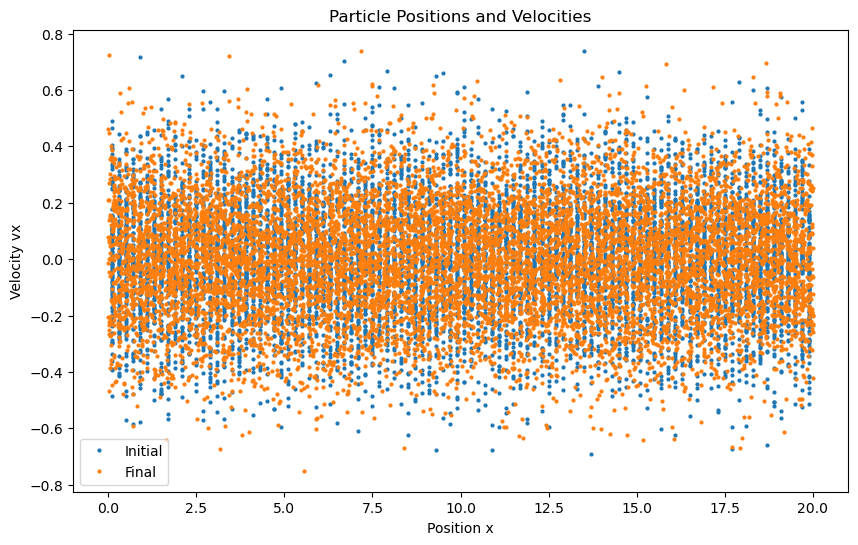

In [268]:
plt.figure(figsize=(10, 6))
plt.plot(x_all[0], vx_all[0], 'o', markersize=2, label='Initial')
plt.plot(x_all[-1], vx_all[-1], 'o', markersize=2, label='Final')
plt.xlabel('Position x')
plt.ylabel('Velocity vx')
plt.title('Particle Positions and Velocities')
plt.legend()
plt.show()

In [269]:
Bx_all = []
By_all = []
Bz_all = []
Ex_all = []
Ey_all = []
Ez_all = []
Vx_all = []
Vy_all = []
Vz_all = []
N_all = []

with h5py.File("../build/fields.h5", "r") as f:
    time_groups = sorted(f["t"].keys(), key=lambda tg: float(tg))
    for t_group in time_groups:
        Bx = f[f"t/{t_group}"]["Bx"][:]
        By = f[f"t/{t_group}"]["By"][:]
        Bz = f[f"t/{t_group}"]["Bz"][:]
        Ex = f[f"t/{t_group}"]["Ex"][:]
        Ey = f[f"t/{t_group}"]["Ey"][:]
        Ez = f[f"t/{t_group}"]["Ez"][:]
        Vx = f[f"t/{t_group}"]["Vx"][:]
        Vy = f[f"t/{t_group}"]["Vy"][:]
        Vz = f[f"t/{t_group}"]["Vz"][:]
        N = f[f"t/{t_group}"]["N"][:]
        Bx_all.append(Bx)
        By_all.append(By)
        Bz_all.append(Bz)
        Ex_all.append(Ex)
        Ey_all.append(Ey)
        Ez_all.append(Ez)   
        Vx_all.append(Vx)
        Vy_all.append(Vy)
        Vz_all.append(Vz)
        N_all.append(N)
        

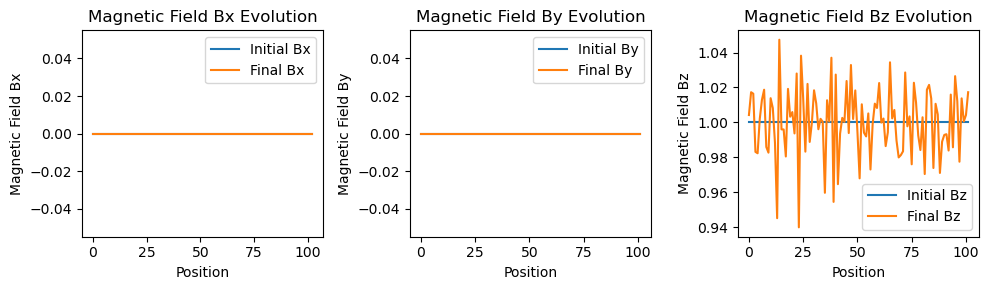

In [275]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(Bx_all[0], label='Initial Bx')
plt.plot(Bx_all[-1], label='Final Bx')
plt.xlabel('Position')
plt.ylabel('Magnetic Field Bx')
plt.title('Magnetic Field Bx Evolution')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(By_all[0], label='Initial By')
plt.plot(By_all[-1], label='Final By')
plt.xlabel('Position')
plt.ylabel('Magnetic Field By')
plt.title('Magnetic Field By Evolution')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(Bz_all[0], label='Initial Bz')
plt.plot(Bz_all[-1], label='Final Bz')
plt.xlabel('Position')
plt.ylabel('Magnetic Field Bz')
plt.title('Magnetic Field Bz Evolution')
plt.legend()
plt.tight_layout()
plt.show()



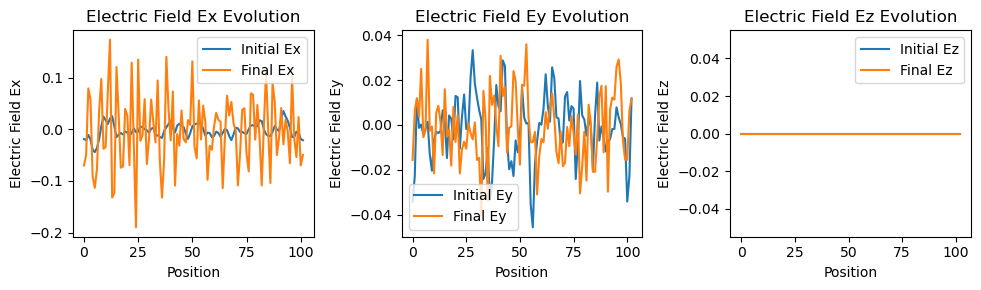

In [276]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(Ex_all[0], label='Initial Ex')
plt.plot(Ex_all[-1], label='Final Ex')
plt.xlabel('Position')
plt.ylabel('Electric Field Ex')
plt.title('Electric Field Ex Evolution')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(Ey_all[0], label='Initial Ey')
plt.plot(Ey_all[-1], label='Final Ey')
plt.xlabel('Position')
plt.ylabel('Electric Field Ey')
plt.title('Electric Field Ey Evolution')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(Ez_all[0], label='Initial Ez')
plt.plot(Ez_all[-1], label='Final Ez')
plt.xlabel('Position')
plt.ylabel('Electric Field Ez')
plt.title('Electric Field Ez Evolution')
plt.legend()
plt.tight_layout()
plt.show()


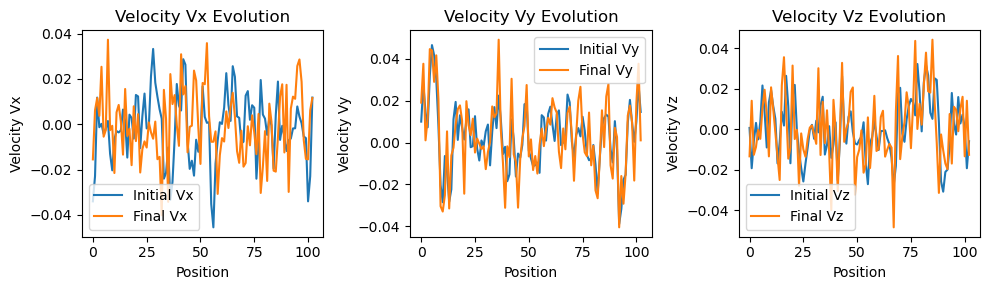

In [277]:

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(Vx_all[0], label='Initial Vx')
plt.plot(Vx_all[-1], label='Final Vx')
plt.xlabel('Position')
plt.ylabel('Velocity Vx')
plt.title('Velocity Vx Evolution')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(Vy_all[0], label='Initial Vy')
plt.plot(Vy_all[-1], label='Final Vy')
plt.xlabel('Position')
plt.ylabel('Velocity Vy')
plt.title('Velocity Vy Evolution')
plt.legend()
plt.subplot(1, 3, 3)    
plt.plot(Vz_all[0], label='Initial Vz')
plt.plot(Vz_all[-1], label='Final Vz')
plt.xlabel('Position')
plt.ylabel('Velocity Vz')
plt.title('Velocity Vz Evolution')
plt.legend()
plt.tight_layout()
plt.show()


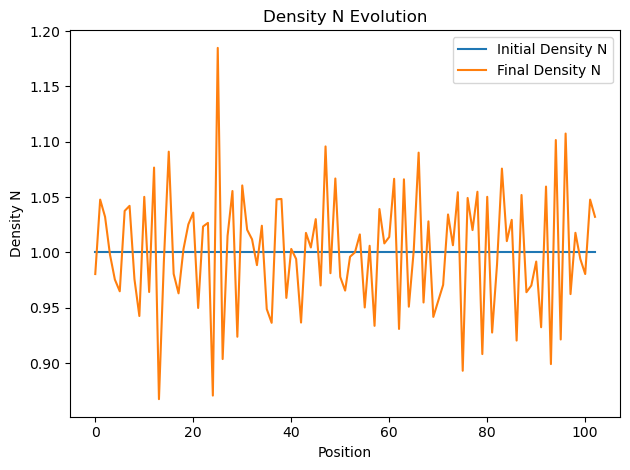

In [278]:
plt.figure()
plt.plot(N_all[0], label='Initial Density N')
plt.plot(N_all[-1], label='Final Density N')
plt.xlabel('Position')
plt.ylabel('Density N')
plt.title('Density N Evolution')
plt.legend()
plt.tight_layout()
plt.show()